In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\pedro\\Downloads\\material+curso+-+Time+Series\\material curso - Time Series\\cafelura.csv')
df.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [3]:
df.dtypes

mes       object
vendas     int64
dtype: object

In [4]:
df['mes'] = pd.to_datetime(df['mes'])
df.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [5]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

-------------------------------------------------------------------------------------------------------------------------------------------------

Normalizando informações do gráfico - Informando os dias de finais de semana

In [10]:
def plot(x, y, df, titulo, xlabel, ylabel):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=df)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax = ax

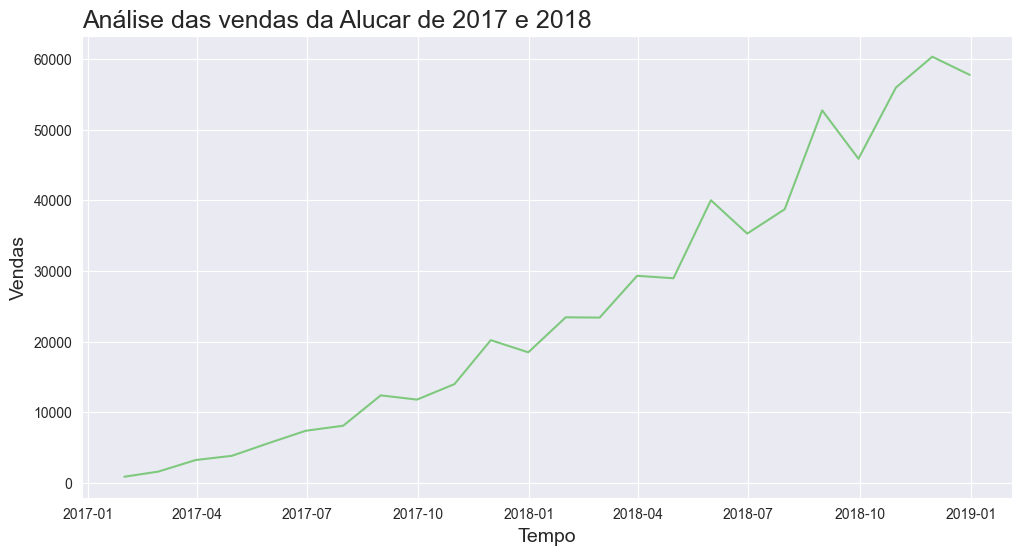

In [16]:
plot('mes', 'vendas', df, 'Análise das vendas da Alucar de 2017 e 2018', 'Tempo', 'Vendas')

Aqui tem a quantidade de dias de finais de semana de todos os meses do ano

In [13]:
qtde_dias_fds = pd.read_csv('C:\\Users\\pedro\\Downloads\\material+curso+-+Time+Series\\material curso - Time Series\\dias_final_de_semana.csv')

qtde_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

Normalizando

In [14]:
df['vendas_normalizadas'] = df['vendas'] / qtde_dias_fds['quantidade_de_dias'].values

df.head()

,mes,vendas,aumento,aceleracao,vendas_normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


Visualização das informações normalizadas (Excluindo os finais de semana)

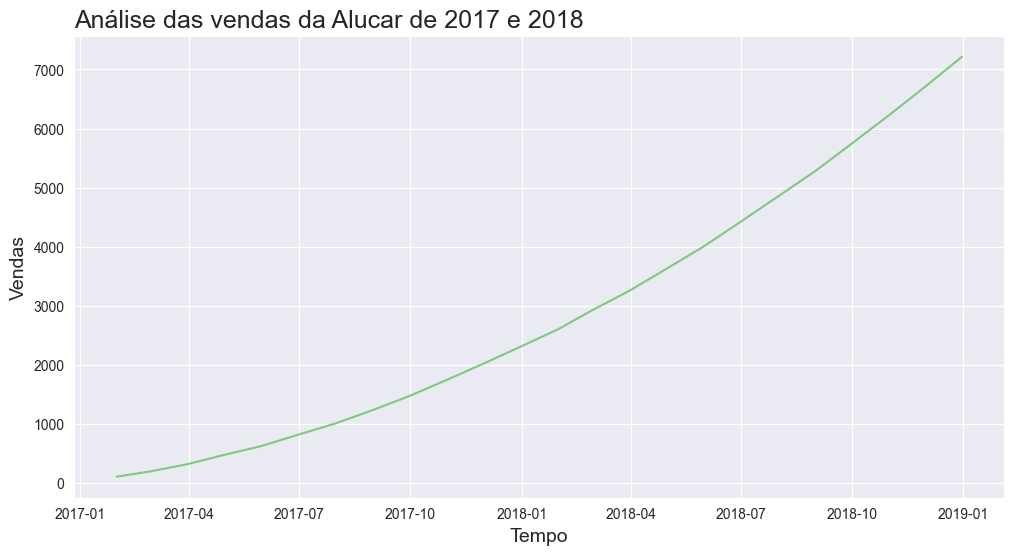

In [18]:
plot('mes', 'vendas_normalizadas', df, 'Análise das vendas da Alucar de 2017 e 2018', 'Tempo', 'Vendas')

-------------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
df['aumento'] = df['vendas'].diff()
df.head()

,mes,vendas,aumento
0,2017-01-31,880,NaN
1,2017-02-28,1600,720.0
2,2017-03-31,3240,1640.0
3,2017-04-30,3840,600.0
4,2017-05-31,5670,1830.0


In [7]:
df['aceleracao'] = df['aumento'].diff()
df.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


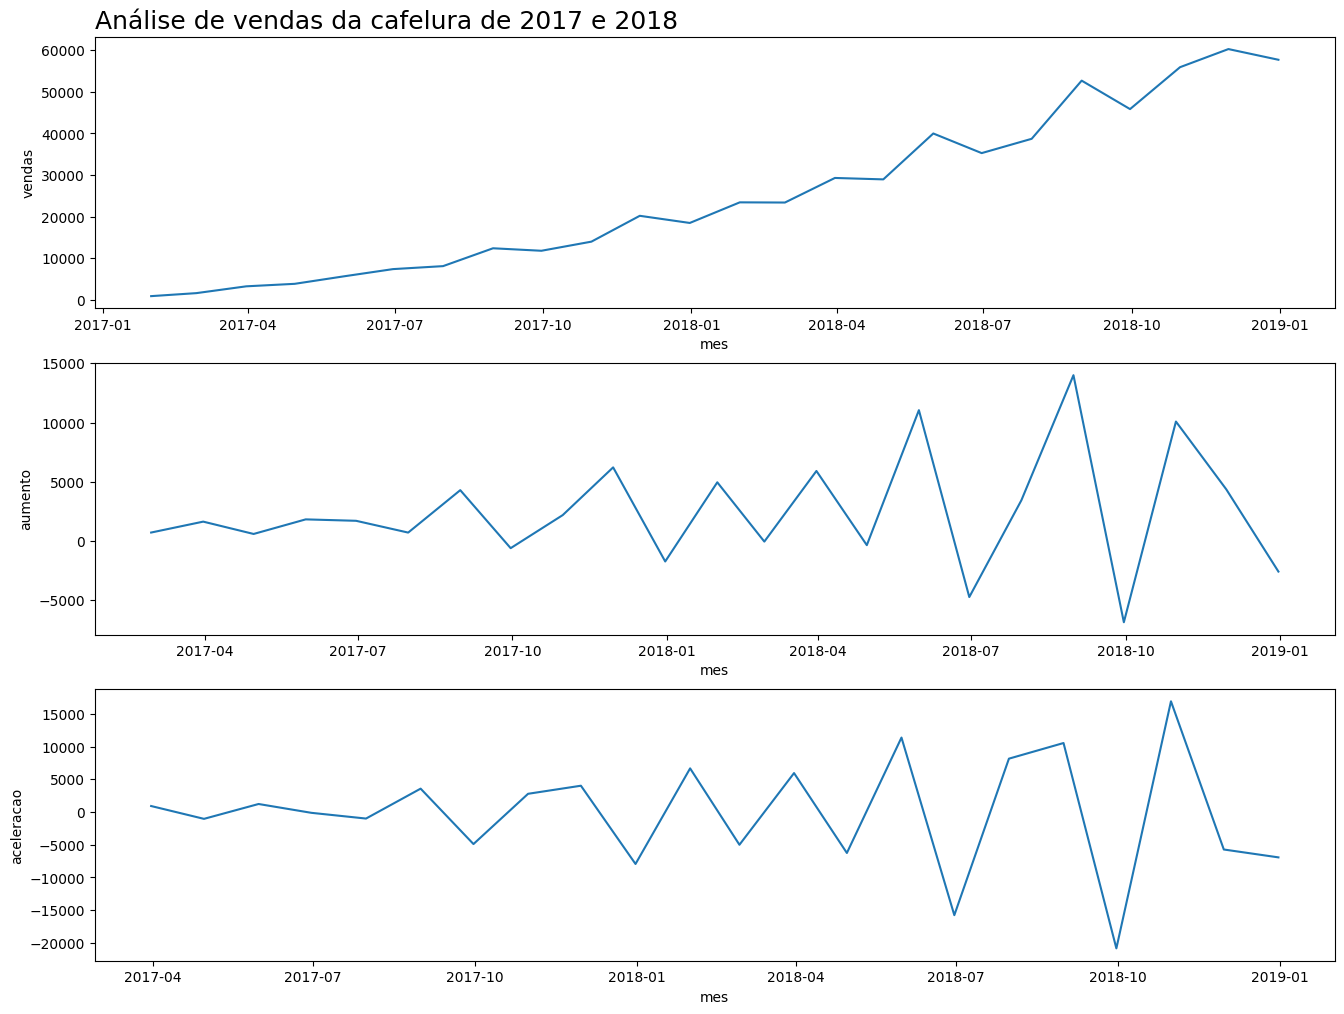

In [9]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da cafelura de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=df)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=df)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=df)
ax=ax